In [1]:
pwd

u'/Users/austinbrian/dev/skeeter_patrol/code'

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('../data/input/train.csv')
train.Date = pd.to_datetime(train.Date)
train['year']=pd.DatetimeIndex(train.Date).year
train['month']=pd.DatetimeIndex(train.Date).month

In [4]:
weather = pd.read_csv('../data/input/weather.csv')
weather.Date = pd.DatetimeIndex(weather.Date)

In [5]:
test = pd.read_csv('../data/input/test.csv')

In [6]:
def eda(dataframe):
    print "Dataframe Shape", dataframe.shape
    print ""
    table = pd.DataFrame({"Missing": dataframe.isnull().sum(),
                          "Types": dataframe.dtypes,
                         "Uniques": [dataframe[i].nunique() for i in dataframe]})
    print table
    print ""
    print "Describe Dataframe"
    print dataframe.describe()

In [135]:
weather_types = {
'\+FC': 'TORNADO/WATERSPOUT', 
'FC': 'FUNNEL CLOUD',
'TS': 'THUNDERSTORM',
'GR': 'HAIL',
'RA': 'RAIN',
'DZ': 'DRIZZLE',
'SN': 'SNOW',
'SG': 'SNOW GRAINS',
'GS': 'SMALL HAIL ANDOR SNOW PELLETS',
'PL': 'ICE PELLETS',
'IC': 'ICE CRYSTALS',
'FG\+': 'HEAVY FOG', # need to escape the plus, this actually works
'FG': 'FOG',
'BR': 'MIST',
'UP': "UNKNOWN PRECIPITATION",
'HZ': 'HAZE',
'FU': 'SMOKE',
'VA': 'VOLCANIC ASH',
'DU': 'WIDESPREAD DUST',
'DS': 'DUSTSTORM',
'PO': 'SAND_DUST WHIRLS',
'SA': 'SAND',
'SS': 'SANDSTORM',
'PY': 'SPRAY',
'SQ': 'SQUALL',
'DR': 'LOW DRIFTING',
'SH': 'SHOWER',
'FZ': 'FREEZING',
'MI': 'SHALLOW',
'PR': 'PARTIAL',
'BC': 'PATCHES',
'BL': 'BLOWING',
'VC': 'VICINITY'}


In [136]:
for i in weather_types:
    weather[i] = 0
    weather.loc[weather['CodeSum'].str.contains(i) == True,i] = 1
weather.head().T

,0,1,2,3,4
Station,1,2,1,2,1
Date,2007-05-01 00:00:00,2007-05-01 00:00:00,2007-05-02 00:00:00,2007-05-02 00:00:00,2007-05-03 00:00:00
Tmax,83,84,59,60,66
Tmin,50,52,42,43,46
Tavg,67,68,51,52,56
Depart,14,M,-3,M,2
DewPoint,51,51,42,42,40
WetBulb,56,57,47,47,48
Heat,0,0,14,13,9
Cool,2,3,0,0,0


In [9]:
# check that character escapings did what we wanted them to do
weather['FG\+'].value_counts()

0    2917
1      27
Name: FG\+, dtype: int64

In [10]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,MI,TS,SH,RA,\+FC,SA,SG,PO,PL,SN
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
spray = pd.read_csv('../data/input/spray.csv')

In [12]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [13]:
spray.groupby('Date').count()

,Time,Latitude,Longitude
Date,,,
2011-08-29,95,95,95
2011-09-07,1530,2114,2114
2013-07-17,2202,2202,2202
2013-07-25,1607,1607,1607
2013-08-08,1195,1195,1195
2013-08-15,2668,2668,2668
2013-08-16,141,141,141
2013-08-22,1587,1587,1587
2013-08-29,2302,2302,2302


In [14]:
train.Date = pd.to_datetime(train.Date)
train['year']=pd.DatetimeIndex(train.Date).year
train['month']=pd.DatetimeIndex(train.Date).month

In [15]:
spray.Date = pd.to_datetime(spray.Date,format='%Y-%M-%d')
spray['year']=pd.DatetimeIndex(spray.Date).year
spray['month']=pd.DatetimeIndex(spray.Date).month

In [16]:
spray.groupby('year').count()

,Date,Time,Latitude,Longitude,month
year,,,,,
2011,2209,1625,2209,2209,2209
2013,12626,12626,12626,12626,12626


In [17]:
train.groupby('year',).WnvPresent.value_counts()

year  WnvPresent
2007  0             3575
      1              236
2009  0             2230
      1               19
2011  0             1997
      1               57
2013  0             2153
      1              239
Name: WnvPresent, dtype: int64

In [18]:
pd.crosstab(train.AddressAccuracy,train.Date)

Date,2007-05-29 00:00:00,2007-06-05 00:00:00,2007-06-26 00:00:00,2007-06-29 00:00:00,2007-07-02 00:00:00,2007-07-11 00:00:00,2007-07-18 00:00:00,2007-07-19 00:00:00,2007-07-25 00:00:00,2007-07-27 00:00:00,...,2013-07-25 00:00:00,2013-08-01 00:00:00,2013-08-08 00:00:00,2013-08-15 00:00:00,2013-08-22 00:00:00,2013-08-29 00:00:00,2013-09-06 00:00:00,2013-09-12 00:00:00,2013-09-19 00:00:00,2013-09-26 00:00:00
AddressAccuracy,,,,,,,,,,,,,,,,,,,,,
3,0,1,1,1,1,2,0,1,0,2,...,1,2,1,2,1,1,2,1,1,1
5,2,1,2,1,3,2,19,15,86,1,...,16,17,20,13,15,12,13,15,13,14
8,19,38,38,29,43,92,64,25,6,50,...,66,82,79,71,79,57,63,62,51,42
9,4,20,29,15,27,56,46,4,0,30,...,70,85,81,71,72,73,65,61,47,35


In [20]:
train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [21]:
train.groupby('Species').sum()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month
Species,,,,,,,,
CULEX ERRATICUS,10,41.974689,-87.890615,9,7,0,2013,9
CULEX PIPIENS,88527,112854.372337,-236649.617578,20040,44671,240,5421463,22044
CULEX PIPIENS/RESTUANS,174429,198865.648503,-416775.307552,37729,66268,262,9550042,36588
CULEX RESTUANS,100789,114693.922296,-240334.622989,21974,23431,49,5508292,19730
CULEX SALINARIUS,2806,3596.961565,-7541.665800,668,145,0,172752,644
CULEX TARSALIS,183,250.908138,-525.969405,45,7,0,12062,53
CULEX TERRITANS,8192,9279.221850,-19460.159333,1687,510,0,445984,1750


In [22]:
train.groupby('Trap').sum()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month
Trap,,,,,,,,
T001,600,629.305575,-1316.009610,120,25,0,30105,121
T002,7585,7761.617650,-16243.183335,1665,3710,18,371867,1370
T003,5612,5119.637524,-10706.431958,976,1346,14,245222,933
T004,588,503.552736,-1052.980404,108,59,0,24084,103
T005,840,587.189596,-1228.869390,112,50,2,28098,117
T006,1440,1007.766816,-2107.131048,192,107,4,48168,187
T007,1426,965.884793,-2018.693417,207,77,0,46161,182
T008,9730,5839.155646,-12201.131019,1251,2668,10,279395,1031
T009,10101,4660.839124,-9751.237237,888,1940,9,223125,838


In [23]:
train[train.Trap =='T035'].Address.value_counts()

5100 West 72nd Street, Chicago, IL 60638, USA      45
3000 South Hoyne Avenue, Chicago, IL 60608, USA    27
Name: Address, dtype: int64

In [24]:
train.groupby(['Date','Trap']).sum()

Block    Latitude   Longitude  AddressAccuracy  NumMosquitos  \
Date       Trap                                                                 
2007-05-29 T002     82   83.909380 -175.601982               18             2   
           T007     62   41.994991  -87.769279                9             1   
           T015    158   83.948178 -175.649624               16             5   
           T045     15   41.921600  -87.666455                8             2   
           T046     25   41.891118  -87.654491                8             1   
           T048     22   83.734216 -175.308448               16             3   
           T049     11   41.896282  -87.655232                8             1   
           T050     21   41.919343  -87.694259                8             1   
           T054     44   83.843930 -175.264170               16             5   
           T086     44   83.376648 -175.353418               16             2   
           T091     11   41.862292  -87.648860                8             1   
           T094     17   41.720848  -87.666014                9             3   
           T096     44   83.463844 -175.355024               16             6   
           T129    106   83.782252 -175.223120               10             3   
           T143     65   41.999129  -87.795585                8             1   
           T148     75   42.017430  -87.687769                8             1   
           T153     15   41.907645  -87.760886                8             1   
           T159     89   41.732984  -87.649642                8             1   
2007-06-05 T002    123  125.864070 -263.402973               27             9   
           T009     91   41.981964  -87.812827                8             2   
           T011     36   41.944869  -87.832763                8             1   
           T015    158   83.948178 -175.649624               16             3   
           T016     72   42.011601  -87.811506                8             1   
           T019     38   41.949830  -87.698457                9             1   
           T025     49   41.979243  -87.750938                9             1   
           T028     58   41.986921  -87.689778                9             2   
           T031     50   41.801498  -87.763416                9             1   
           T033     14   41.906638  -87.701431                9             3   
           T045     45  125.764800 -262.999365               24             4   
           T046     25   41.891118  -87.654491                8             1   
...                ...         ...         ...              ...           ...   
2013-09-26 T099     89   41.733643  -87.555510                8             5   
           T102     30  125.251494 -262.815882               15             4   
           T114    104   83.597394 -175.473624               16             4   
           T115     24   83.346816 -175.199724               10             7   
           T128     48   83.409144 -175.131332               16            11   
           T135     84   83.324028 -175.449216               16             7   
           T138     20   83.452930 -175.170826               10            10   
           T145     43   41.878114  -87.629798                3             2   
           T151     70   41.916265  -87.800515                8             8   
           T152     25   41.846075  -87.716277                9             2   
           T155     63   41.776156  -87.778927                9             4   
           T158     35   41.682587  -87.707973                9             8   
           T159    178   83.465968 -175.299284               16            27   
           T209     39  125.221923 -262.639761               15            18   
           T212     74   83.361892 -175.070396               16             3   
           T220     45   41.963976  -87.691810                9             8   
           T221    120  124.977336 -262.616079  

In [25]:
date_trap_train = pd.DataFrame(train.groupby(['Date','Trap']).sum())

In [26]:
date_trap_train.head()

Block   Latitude   Longitude  AddressAccuracy  NumMosquitos  \
Date       Trap                                                                
2007-05-29 T002     82  83.909380 -175.601982               18             2   
           T007     62  41.994991  -87.769279                9             1   
           T015    158  83.948178 -175.649624               16             5   
           T045     15  41.921600  -87.666455                8             2   
           T046     25  41.891118  -87.654491                8             1   

                 WnvPresent  year  month  
Date       Trap                           
2007-05-29 T002           0  4014     10  
           T007           0  2007      5  
           T015           0  4014     10  
           T045           0  2007      5  
           T046           0  2007      5

In [27]:
train.groupby(['Trap','year','month']).agg({'NumMosquitos':sum,'WnvPresent':sum,'month':'count','Latitude':np.mean,'Longitude':np.mean})

NumMosquitos   Latitude  Longitude  WnvPresent  month
Trap year month                                                       
T001 2007 6                 1  41.953705 -87.733974           0      1
          7                 2  41.953705 -87.733974           0      2
          8                19  41.953705 -87.733974           0      9
          9                 1  41.953705 -87.733974           0      1
          10                2  41.953705 -87.733974           0      2
T002 2007 5                 2  41.954690 -87.800991           0      2
          6                17  41.954690 -87.800991           0      7
          7                80  41.954690 -87.800991           0     11
          8               413  41.954690 -87.800991           5     18
          9               146  41.954690 -87.800991           3      8
          10               82  41.954690 -87.800991           0      3
     2009 5                 2  41.954690 -87.800991           0      1
          6               189  41.954690 -87.800991           0     13
          7               552  41.954690 -87.800991           1     22
          8                34  41.954690 -87.800991           0      4
          9                41  41.954690 -87.800991           0      6
     2011 6                58  41.954690 -87.800991           0      5
          7               173  41.954690 -87.800991           0     10
          8                78  41.954690 -87.800991           0      6
          9                51  41.954690 -87.800991           1      9
     2013 6               371  41.954690 -87.800991           0     12
          7               890  41.954690 -87.800991           0     22
          8               357  41.954690 -87.800991           7     17
          9               174  41.954690 -87.800991           1      9
T003 2007 6                 2  41.964242 -87.757639           0      1
          7                 9  41.964242 -87.757639           0      6
          8               164  41.964242 -87.757639           4     16
          9                20  41.964242 -87.757639           0      5
          10               19  41.964242 -87.757639           0      2
     2009 5                 1  41.964242 -87.757639           0      1
...                       ...        ...        ...         ...    ...
T236 2013 9                34  41.994679 -87.770899           1      4
T237 2011 9                18  41.738903 -87.695443           0      3
T238 2011 9                34  41.753391 -87.707394           0      7
T900 2009 5                34  41.974689 -87.890615           0      2
          6              3008  41.974689 -87.890615           0     93
          7              1557  41.974689 -87.890615           0     83
          8               678  41.974689 -87.890615           1     51
          9               194  41.974689 -87.890615           1     39
          10               17  41.974689 -87.890615           0      5
     2011 6              1401  41.974689 -87.890615           0     70
          7              1548  41.974689 -87.890615           5     65
          8               659  41.974689 -87.890615          10     49
          9               601  41.974689 -87.890615           3     55
     2013 6               944  41.974689 -87.890615           0     45
          7              1371  41.974689 -87.890615           3     59
          8              2136  41.974689 -87.890615          28     88
          9              1238  41.974689 -87.890615          15     46
T903 2009 6               548  41.957799 -87.930995           0     16
          7               255  41.957799 -87.930995           0     19
          8               230  41.957799 -87.930995           2     12
          9                29  41.957799 -87.930995           0     10
          10               17  41.957799 -87.930995           0      2
     2011 6               111  41.957799 -87.930995           0      6
          7               556  41.957799 

In [64]:
train['Total_Mosquitos_today'] = train.groupby(['Trap','Date'])['NumMosquitos'].transform('sum')
train['Total_Species_today'] = train.groupby(['Trap','Date','Species'])['NumMosquitos'].transform('sum')

In [69]:
train[['Trap','Species','NumMosquitos','Total_Mosquitos_today','Total_Species_today']].head(50)

,Trap,Species,NumMosquitos,Total_Mosquitos_today,Total_Species_today
0,T002,CULEX PIPIENS/RESTUANS,1,2,1
1,T002,CULEX RESTUANS,1,2,1
2,T007,CULEX RESTUANS,1,1,1
3,T015,CULEX PIPIENS/RESTUANS,1,5,1
4,T015,CULEX RESTUANS,4,5,4
5,T045,CULEX RESTUANS,2,2,2
6,T046,CULEX RESTUANS,1,1,1
7,T048,CULEX PIPIENS/RESTUANS,1,3,1
8,T048,CULEX RESTUANS,2,3,2
9,T049,CULEX RESTUANS,1,1,1


In [28]:
date_train = pd.DataFrame(train.groupby(['Trap','year','month']).agg({'NumMosquitos':sum,'WnvPresent':sum,'month':'count','Latitude':np.mean,'Longitude':np.mean}))

In [29]:
date_train.loc[:,'wnv_binary'] = 0
date_train.loc[date_train.WnvPresent>0,'wnv_binary'] = 1

# Modeling Num Mosquitos

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def evaluate_model(m):
    model = m.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred,labels =[0,1])
    class_report = classification_report
    print m,'\n'
    print "Accuracy Score:\t{:0.3}".format(score.round(3)),'\n\n'
    crossval = cross_val_score(m, X, y,cv=7)
    print "Cross Val Scores:", crossval,'\n'
    print "Avg cross val:", np.mean(crossval),'\n'
    print "Predicted Totals:"
    for i,v in enumerate(np.bincount(y)):
        print "class "+str(i)+':' , v
    print "\nConfusion Matrix:"
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['Actual 1', 'Actual 0'],
                         columns=['Predicted 1','Predicted 0'])
    print(confusion),'\n'
    print "Classification Report:"
    print(classification_report(y_test, y_pred, target_names=['0','1']))

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['trap_e'] = le.fit_transform(train['Trap'])
train['mosquito']=le.fit_transform(train['Species'])

In [33]:
X = train[['NumMosquitos','trap_e','year']]
y = train.WnvPresent
model = lr.fit(X,y)

def lr_score(m):
    print "Regression score: ",lr.score(X,y),'\n'
    for i,v in enumerate(X.columns):
        print v
        print "\tCoefficient:", lr.coef_[0][i]
        print "\tOdds ratio:",np.exp(lr.coef_[0][i])
lr_score(model)

Regression score:  0.947553778793 

NumMosquitos
	Coefficient: 0.0416181665323
	Odds ratio: 1.04249634275
trap_e
	Coefficient: -0.00194528572461
	Odds ratio: 0.998056605117
year
	Coefficient: -0.00175470328992
	Odds ratio: 0.998246835302


> So the trap itself (encoded to work with logisitc regression) isn't a good predictor of whether there will be west nile virus.
With every additional mosquito, a trap becomes 4% more likely to have west nile virus.

In [34]:
# Try again with groupby, such that the mosquitos are binned together in each trap, grouped by month
X = date_train[['NumMosquitos','month']]
Y = date_train.wnv_binary
model = lr.fit(X,y)
lr_score(model)

ValueError: Found input variables with inconsistent numbers of samples: [1453, 10506]

In [35]:
train[train.WnvPresent==1].groupby('Species').WnvPresent.value_counts()

Species                 WnvPresent
CULEX PIPIENS           1             240
CULEX PIPIENS/RESTUANS  1             262
CULEX RESTUANS          1              49
Name: WnvPresent, dtype: int64

In [36]:
train['carrier_species'] = 0
train.loc[train.WnvPresent==1,'carrier_species'] = 1

In [37]:
X = train[['carrier_species','Latitude','Longitude','trap_e']]
y = train.NumMosquitos
lr.fit(X,y)
print("logistic score: ",lr.score(X,y))
for i,v in enumerate(X.columns):
    print "Coefficient:",v, lr.coef_[0][i]
    print "\tOdds ratio:",v,np.exp(lr.coef_[0][i])

('logistic score: ', 0.21768513230534933)
Coefficient: carrier_species -1.98646354002
	Odds ratio: carrier_species 0.137179699149
Coefficient: Latitude 1.98866309466
	Odds ratio: Latitude 7.30576012084
Coefficient: Longitude 0.959985335664
	Odds ratio: Longitude 2.61165817491
Coefficient: trap_e -0.00411231053489
	Odds ratio: trap_e 0.995896133435


> For every one point increase in latitude (move west), an additional mosquito is 76% more likely.
For every one point increase in longitude (move north), an additional mosquito is 4.8 times more likely.

Big issue - if we think that the total number of mosquitos is going to be predictive of WNV, need to figure out the multiple inputs for each group.

In [38]:
train.groupby(['Date','Trap','Species']).agg({"NumMosquitos":sum,"WnvPresent":sum})

NumMosquitos  WnvPresent
Date       Trap Species                                         
2007-05-29 T002 CULEX PIPIENS/RESTUANS             1           0
                CULEX RESTUANS                     1           0
           T007 CULEX RESTUANS                     1           0
           T015 CULEX PIPIENS/RESTUANS             1           0
                CULEX RESTUANS                     4           0
           T045 CULEX RESTUANS                     2           0
           T046 CULEX RESTUANS                     1           0
           T048 CULEX PIPIENS/RESTUANS             1           0
                CULEX RESTUANS                     2           0
           T049 CULEX RESTUANS                     1           0
           T050 CULEX PIPIENS/RESTUANS             1           0
           T054 CULEX PIPIENS/RESTUANS             2           0
                CULEX RESTUANS                     3           0
           T086 CULEX PIPIENS/RESTUANS             1           0
                CULEX RESTUANS                     1           0
           T091 CULEX RESTUANS                     1           0
           T094 CULEX RESTUANS                     3           0
           T096 CULEX PIPIENS                      1           0
                CULEX RESTUANS                     5           0
           T129 CULEX PIPIENS/RESTUANS             1           0
                CULEX RESTUANS                     2           0
           T143 CULEX PIPIENS/RESTUANS             1           0
           T148 CULEX PIPIENS/RESTUANS             1           0
           T153 CULEX RESTUANS                     1           0
           T159 CULEX RESTUANS                     1           0
2007-06-05 T002 CULEX PIPIENS                      1           0
                CULEX PIPIENS/RESTUANS             3           0
                CULEX RESTUANS                     5           0
           T009 CULEX RESTUANS                     2           0
           T011 CULEX RESTUANS                     1           0
...                                              ...         ...
2013-09-26 T155 CULEX PIPIENS/RESTUANS             4           1
           T158 CULEX PIPIENS/RESTUANS             8           0
           T159 CULEX PIPIENS                      6           0
                CULEX PIPIENS/RESTUANS            21           0
           T209 CULEX PIPIENS                      6           0
                CULEX PIPIENS/RESTUANS            11           0
                CULEX RESTUANS                     1           0
           T212 CULEX PIPIENS                      2           0
                CULEX PIPIENS/RESTUANS             1           0
           T220 CULEX RESTUANS                     8           0
           T221 CULEX PIPIENS                      4           0
                CULEX PIPIENS/RESTUANS             5           0
                CULEX RESTUANS                     5           0
           T222 CULEX PIPIENS/RESTUANS             1           0
           T223 CULEX PIPIENS                      1           0
                CULEX PIPIENS/RESTUANS            11           0
           T224 CULEX PIPIENS/RESTUANS             3           0
           T225 CULEX PIPIENS/RESTUANS             3           0
           T226 CULEX PIPIENS/RESTUANS             8           0
           T227 CULEX PIPIENS                      1           0
                CULEX PIPIENS/RESTUANS             7           0
           T228 CULEX PIPIENS/RESTUANS             3           0
           T230 CULEX PIPIENS                      5           0
                CULEX PIPIENS/RESTUANS            13           0
           T231 CULEX PIPIENS/RESTUANS             5           0
           T232 CULEX PIPIENS/RESTUANS             1           0
           T233 CULEX PIPIENS/RESTUANS             5           0
           T235 CULEX PIPIENS/RESTUANS             1           0
           T900 CULEX PIPIENS                     37           0
          

In [39]:
species = pd.DataFrame(train.groupby(['Species']).agg({"NumMosquitos":sum,"WnvPresent":sum}))

In [40]:
species['infection_rate'] = species.WnvPresent/species.NumMosquitos

In [41]:
species

,NumMosquitos,WnvPresent,infection_rate
Species,,,
CULEX ERRATICUS,7,0,0.000000
CULEX PIPIENS,44671,240,0.005373
CULEX PIPIENS/RESTUANS,66268,262,0.003954
CULEX RESTUANS,23431,49,0.002091
CULEX SALINARIUS,145,0,0.000000
CULEX TARSALIS,7,0,0.000000
CULEX TERRITANS,510,0,0.000000


# Coordinates

In [42]:
station_coords = {
        1: (41.995,-87.933),
        2: (41.786,-87.752)}

In [43]:
train['Coordinates'] = train[['Latitude', 'Longitude']].apply(tuple, axis=1)

In [44]:
import math
def distance(loc1, loc2):
    lat1, lon1 = loc1
    lat2, lon2 = loc2
    radius = 6371 # radius of Earth in KM

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [45]:
def assign_station(i):
    if distance(station_coords[1], i) < distance(station_coords[2], i):
        return 1
    else:
        return 2

train['Weather_Station'] = train.Coordinates.apply(assign_station)

In [46]:
coords = set(train.Coordinates)

# n-1 Weather

In [47]:
weather.head().T

,0,1,2,3,4
Station,1,2,1,2,1
Date,2007-05-01 00:00:00,2007-05-01 00:00:00,2007-05-02 00:00:00,2007-05-02 00:00:00,2007-05-03 00:00:00
Tmax,83,84,59,60,66
Tmin,50,52,42,43,46
Tavg,67,68,51,52,56
Depart,14,M,-3,M,2
DewPoint,51,51,42,42,40
WetBulb,56,57,47,47,48
Heat,0,0,14,13,9
Cool,2,3,0,0,0


In [48]:
ohare = weather[weather.Station == 1]
ohare.reset_index(drop=True, inplace=True)
ohare.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,MI,TS,SH,RA,\+FC,SA,SG,PO,PL,SN
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-03,66,46,56,2,40,48,9,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2007-05-04,66,49,58,4,41,50,7,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2007-05-05,66,53,60,5,38,49,5,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
assert ohare.Date.nunique() == ohare.Station.sum() # check that all of the ohares are unique, using station = 1

In [50]:
weather.Date = pd.DatetimeIndex(weather.Date)

In [51]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,MI,TS,SH,RA,\+FC,SA,SG,PO,PL,SN
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
weather['w_n-1'] = weather.Date-pd.DateOffset(1)

In [53]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month,trap_e,mosquito,carrier_species,Coordinates,Weather_Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,5,1,2,0,"(41.95469, -87.800991)",1


In [198]:
df = train.loc[550:650,:]
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,year,month,trap_e,mosquito,carrier_species,Coordinates,Weather_Station,Total_Mosquitos,Total_Mosquitos_today,Total_Species_today
550,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,...,2007,7,112,3,0,"(41.680946, -87.535198)",2,140,140,12
551,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,...,2007,7,112,1,0,"(41.680946, -87.535198)",2,140,140,26
552,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,...,2007,7,113,2,0,"(41.686398, -87.531635)",2,85,85,63
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,...,2007,7,113,2,1,"(41.686398, -87.531635)",2,85,85,63
554,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,...,2007,7,113,3,0,"(41.686398, -87.531635)",2,85,85,1


In [203]:
def n_1_weather(df):
    for i in range(1,7):
        n_date = '_date-'+str(i)
        df.loc[:,n_date] = df.Date-pd.DateOffset(i)
        df = pd.merge(left=df,right=weather,left_on=[n_date,'Weather_Station'],right_on=['Date','Station'],suffixes =('',n_date))

In [204]:
n_1_weather(df)

In [199]:
n_1_weather_dates(df)

In [205]:
df.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'year', u'month',
       u'trap_e', u'mosquito', u'carrier_species', u'Coordinates',
       u'Weather_Station', u'Total_Mosquitos', u'Total_Mosquitos_today',
       u'Total_Species_today', u'_date-1', u'_date-2', u'_date-3', u'_date-4',
       u'_date-5', u'_date-6'],
      dtype='object')

In [101]:
X_list = [i for i in df.columns]
print X_list,

['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'year', 'month', 'trap_e', 'mosquito', 'carrier_species', 'Coordinates', 'Weather_Station', 'Total_Mosquitos', 'Total_Mosquitos_today', 'Total_Species_today', 'NearestStation', '_date-1', '_date-2', '_date-3', '_date-4', '_date-5', '_date-6', 'Station', 'Date_date-1', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'HZ', 'VA', 'VC', 'GS', 'GR', 'FG\\+', 'BC', 'BL', 'FZ', 'UP', 'FC', 'DZ', 'BR', 'FG', 'IC', 'DU', 'DR', 'DS', 'FU', 'PR', 'SS', 'SQ', 'PY', 'MI', 'TS', 'SH', 'RA', '\\+FC', 'SA', 'SG', 'PO', 'PL', 'SN', 'Station_date-2', 'Date_date-2', 'Tmax_date-2', 'Tmin_date-2', 'Tavg_date-2', 'Depart_date-2', 'DewPoint_date-2', 'WetBulb_date-2', 'Heat_date-2', 'Coo

In [146]:
n_weather = weather.iloc[12:,:]
# n_weather.drop('w_n-1',axis=1,inplace=True)

In [147]:
n_1_weather_dates(n_weather)

In [148]:
n_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,PO,PL,SN,+FC,_date-1,_date-2,_date-3,_date-4,_date-5,_date-6
12,1,2007-05-07,83,47,65,10,41,54,0,0,...,0,0,0,0,2007-05-06,2007-05-05,2007-05-04,2007-05-03,2007-05-02,2007-05-01
13,2,2007-05-07,84,50,67,M,39,53,0,2,...,0,0,0,0,2007-05-06,2007-05-05,2007-05-04,2007-05-03,2007-05-02,2007-05-01
14,1,2007-05-08,82,54,68,12,58,62,0,3,...,0,0,0,0,2007-05-07,2007-05-06,2007-05-05,2007-05-04,2007-05-03,2007-05-02
15,2,2007-05-08,80,60,70,M,57,63,0,5,...,0,0,0,0,2007-05-07,2007-05-06,2007-05-05,2007-05-04,2007-05-03,2007-05-02
16,1,2007-05-09,77,61,69,13,59,63,0,4,...,0,0,0,0,2007-05-08,2007-05-07,2007-05-06,2007-05-05,2007-05-04,2007-05-03


In [144]:
weather.drop('w_n-1',axis=1,inplace=True)

In [119]:
n_weather = pd.merge(left=n_weather,right=weather,left_on=['_date-1','Station'],right_on=['Date','Station'],suffixes=('','_date-1'))

In [200]:
for i in range(1,7): # Hard-coded range of the last 6 days
    n_date = "_date-"+str(i)
    n_weather = pd.merge(left=n_weather,right=weather,left_on=[n_date,'Station'],right_on=['Date','Station'],suffixes =('',n_date))

In [151]:
X_list = [i for i in n_weather.columns]
print X_list,

['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'HZ', 'VA', 'VC', 'GS', 'GR', 'FG\\+', 'BC', 'BL', 'FZ', 'UP', 'FC', 'DZ', 'BR', 'FG', 'IC', 'DU', 'DR', 'DS', 'FU', 'PR', 'SS', 'SQ', 'PY', 'MI', 'TS', 'SH', 'RA', '\\+FC', 'SA', 'SG', 'PO', 'PL', 'SN', '+FC', '_date-1', '_date-2', '_date-3', '_date-4', '_date-5', '_date-6', 'Date_date-1', 'Tmax_date-1', 'Tmin_date-1', 'Tavg_date-1', 'Depart_date-1', 'DewPoint_date-1', 'WetBulb_date-1', 'Heat_date-1', 'Cool_date-1', 'Sunrise_date-1', 'Sunset_date-1', 'CodeSum_date-1', 'Depth_date-1', 'Water1_date-1', 'SnowFall_date-1', 'PrecipTotal_date-1', 'StnPressure_date-1', 'SeaLevel_date-1', 'ResultSpeed_date-1', 'ResultDir_date-1', 'AvgSpeed_date-1', 'HZ_date-1', 'VA_date-1', 'VC_date-1', 'GS_date-1', 'GR_date-1', 'FG\\+_date-1', 'BC_date-1', 'BL_date-1', 'FZ_d

In [152]:
n_weather.to_csv('n_weather',index=False)

In [153]:
n_weather = pd.read_csv('n_weather')

/Users/austinbrian/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21,82,137,192,247,302,357) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [154]:
n_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,TS_date-6,SH_date-6,RA_date-6,\+FC_date-6,SA_date-6,SG_date-6,PO_date-6,PL_date-6,SN_date-6,+FC_date-6
0,1,2007-05-07,83,47,65,10,41,54,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2007-05-07,84,50,67,M,39,53,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-08,82,54,68,12,58,62,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2,2007-05-08,80,60,70,M,57,63,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1,2007-05-09,77,61,69,13,59,63,0,4,...,0,0,0,0,0,0,0,0,0,0


In [155]:
n_weather.iloc[:10,81]

0    11
1    10
2    18
3    17
4    11
5     8
6     9
7     7
8    17
9     9
Name: ResultDir_date-1, dtype: int64

# Traps had WNV in past week?

In [158]:
len(train.Trap.unique())

136

In [ ]:
for i in len(train.Trap.unique()):
    

In [196]:
train[train.WnvPresent == 1].head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,year,month,trap_e,mosquito,carrier_species,Coordinates,Weather_Station,Total_Mosquitos,Total_Mosquitos_today,Total_Species_today
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,...,2007,7,113,2,1,"(41.686398, -87.531635)",2,85,85,63
603,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,...,2007,7,82,2,1,"(41.673408, -87.599862)",2,3002,3002,644


In [165]:
train['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [233]:
df.loc[553,['Trap','Species','Date']]

Trap                         T215
Species    CULEX PIPIENS/RESTUANS
Date          2007-07-18 00:00:00
Name: 553, dtype: object

In [235]:
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Total_Mosquitos,Total_Mosquitos_today,Total_Species_today,_date-1,_date-2,_date-3,_date-4,_date-5,_date-6,WNV_past_week
550,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,...,140,140,12,2007-07-17,2007-07-16,2007-07-15,2007-07-14,2007-07-13,2007-07-12,0.0
551,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,...,140,140,26,2007-07-17,2007-07-16,2007-07-15,2007-07-14,2007-07-13,2007-07-12,0.0
552,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,...,85,85,63,2007-07-17,2007-07-16,2007-07-15,2007-07-14,2007-07-13,2007-07-12,0.0
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,...,85,85,63,2007-07-17,2007-07-16,2007-07-15,2007-07-14,2007-07-13,2007-07-12,0.0
554,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,...,85,85,1,2007-07-17,2007-07-16,2007-07-15,2007-07-14,2007-07-13,2007-07-12,0.0


In [237]:
for i in df.index:
    n_dates = []
    trap = df.loc[i,'Trap']
    species = df.loc[i,'Species']
    date = df.loc[i,'Date']
    caught_in_trap = 0
    caught_in_trap+=df.loc[i,'WnvPresent']
    for j in range(1,7):
        n_date = train.loc[i,'Date']-pd.DateOffset(j)
        WNV = df.loc[(df.Date ==n_date)&(df.Species ==species)&(df.Trap==trap),'WnvPresent']
        caught_in_trap+=WNV
    df.loc[i,'WNV_past_week'] = caught_in_trap

ValueError: Incompatible indexer with Series

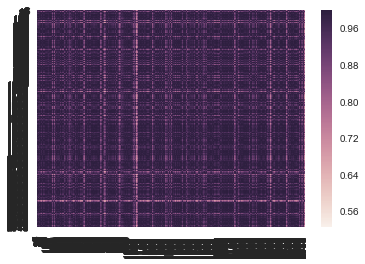

In [225]:
weather_nums = weather[['Station','Tmax','Tmin','DewPoint','ResultSpeed','ResultDir']]
W_corr = np.corrcoef(weather_nums[weather_nums.Station==1],weather_nums[weather_nums.Station==2])
sns.heatmap(W_corr)

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [215]:
caught_in_trap

0